# **Basic Statistics:**

## **Load the Dataset:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the dataset
data = pd.read_csv('sales_data_with_discounts.csv')

In [ ]:
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
data.tail()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174
449,15-04-2021,Thursday,L10,C,1,Lifestyle,Jeera,M-Shoes,3100,3100,15.333300,475.332295,2624.667705


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


## **Descriptive Analytics for Numerical Columns:**

In [ ]:
# Identify numerical columns
numerical_columns = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Calculate basic statistics: mean, median, mode, standard deviation
stats = data[numerical_columns].agg(['mean', 'median', 'std']).T
modes = data[numerical_columns].mode().iloc[0]
stats['mode'] = modes

print(stats)

                           mean       median           std          mode
Volume                 5.066667     4.000000      4.231602      3.000000
Avg Price          10453.433333  1450.000000  18079.904840    400.000000
Total Sales Value  33812.835556  5700.000000  50535.074173  24300.000000
Discount Rate (%)     15.155242    16.577766      4.220602      5.007822
Discount Amount     3346.499424   988.933733   4509.902963     69.177942
Net Sales Value    30466.336131  4677.788059  46358.656624    326.974801


## **Data Visualization:**

### **Histograms**

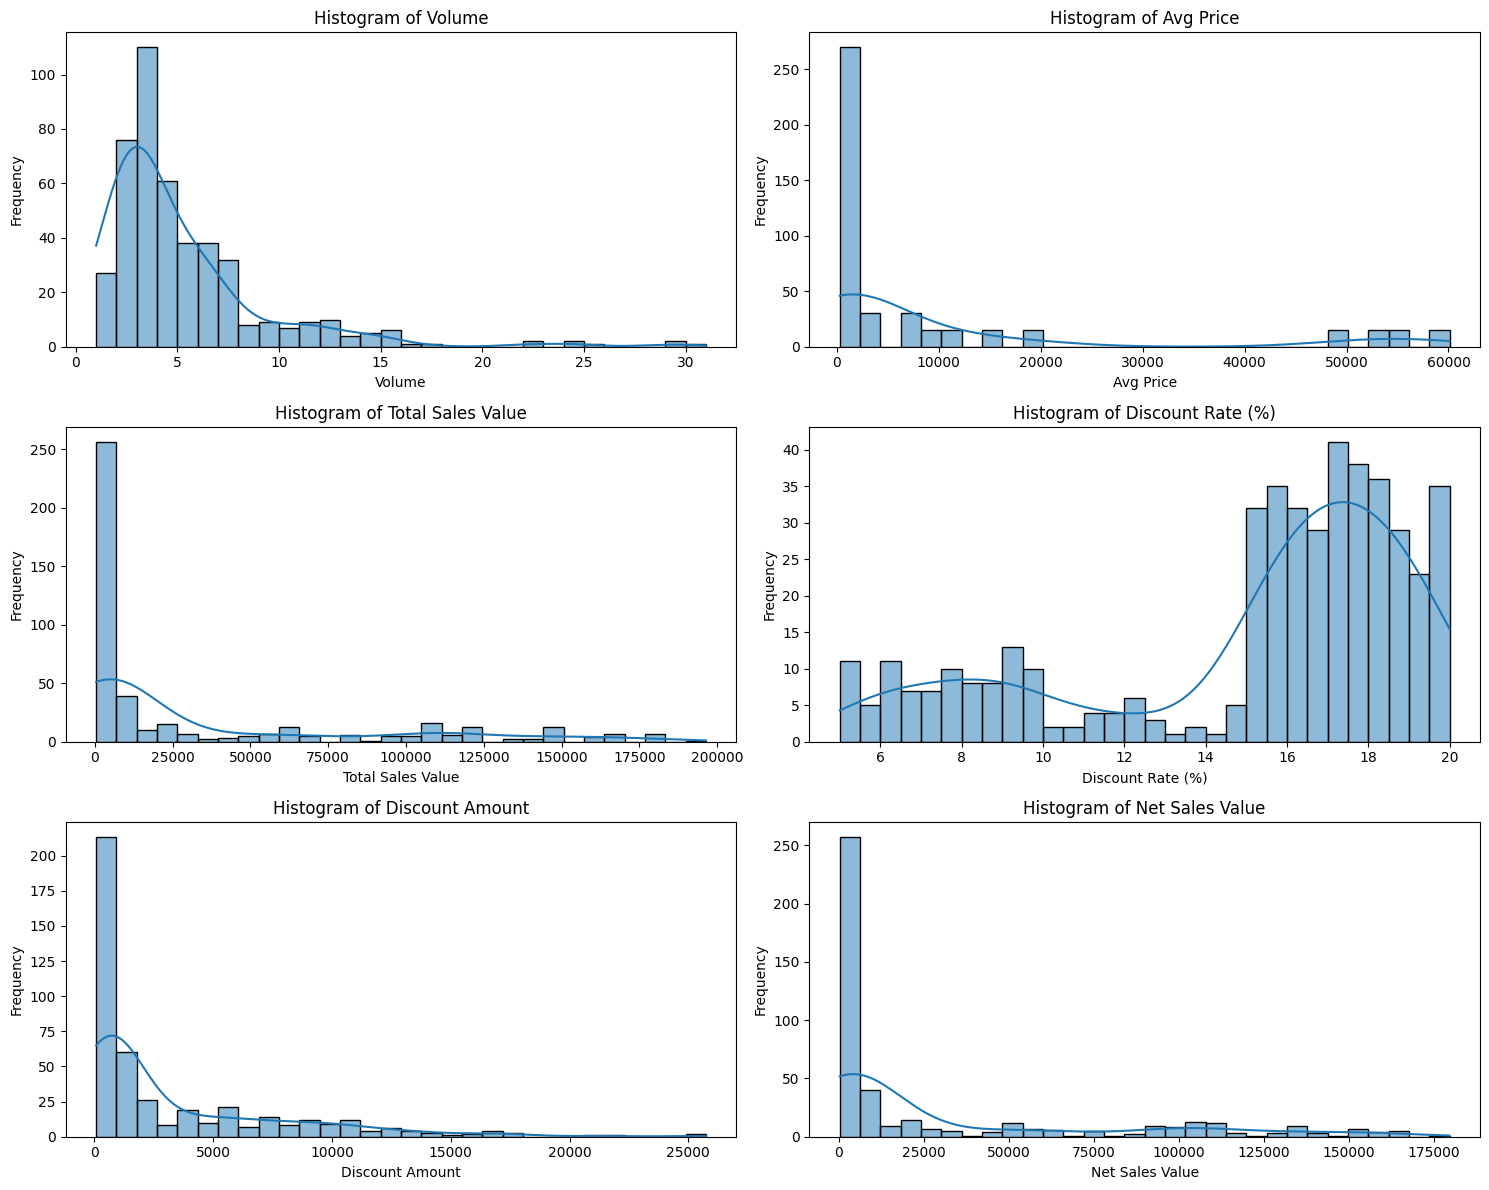

In [ ]:
# Plot histograms
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **BoxPlots**

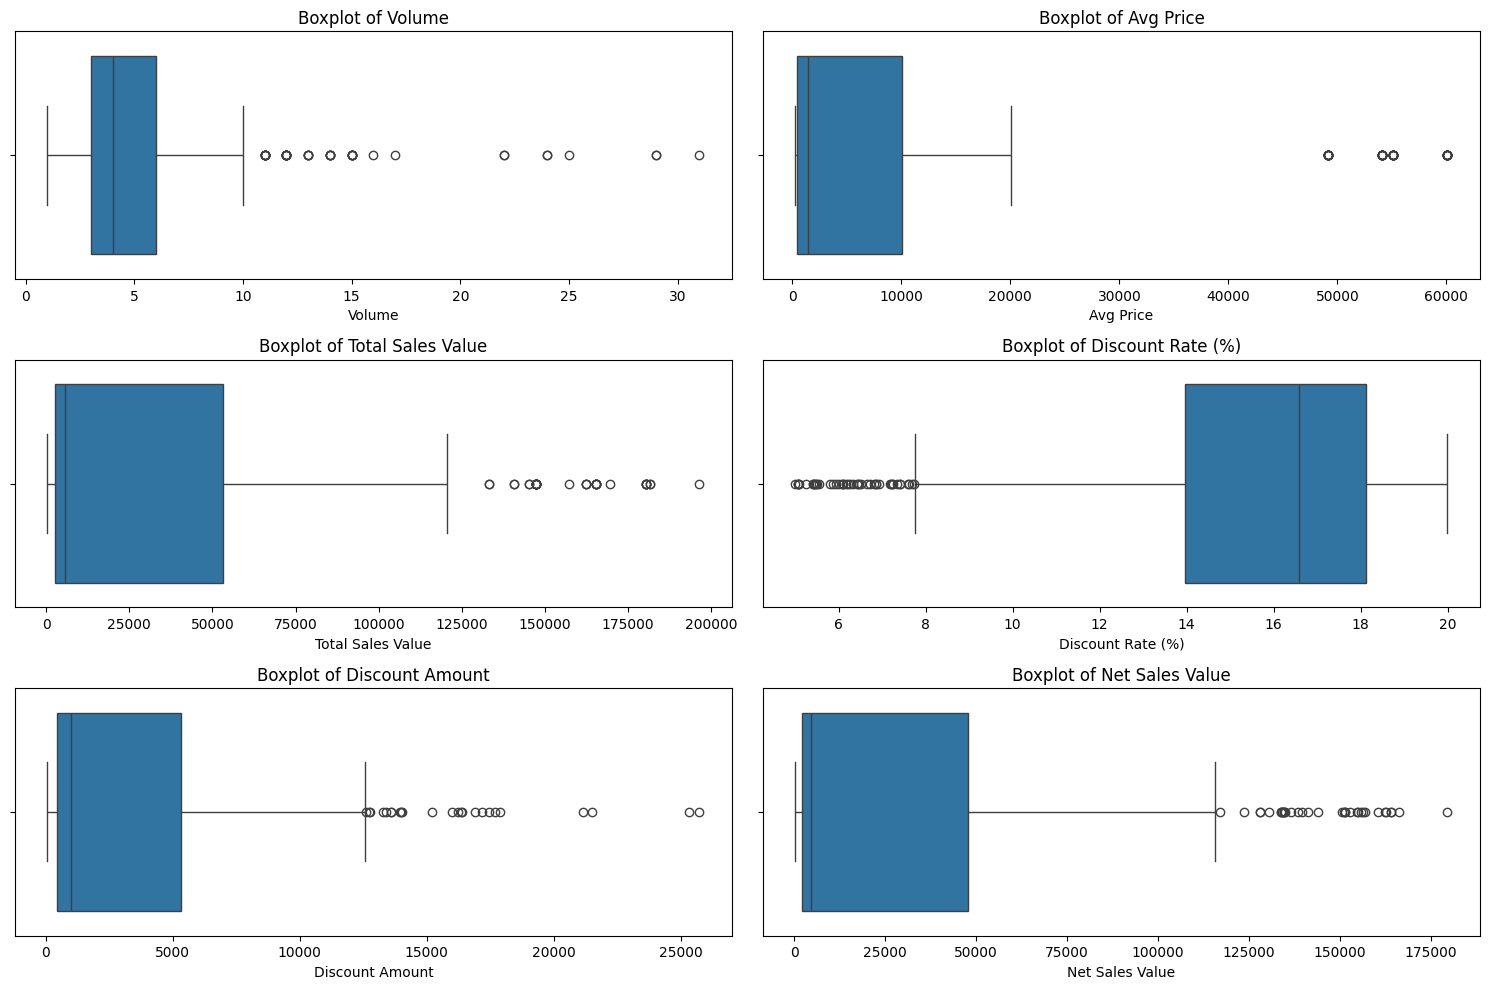

In [ ]:
# Plot boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


**Volume:** Outliers here might indicate bulk purchases or special promotions.  
**Avg Price:** Outliers here likely represent high-end products. The spread of the box and whiskers can give insights into the range of product prices offered.  
**Discount Rate and Amount:** Outliers in discount rates or amounts might represent special cases, like clearance sales or high discounts on specific items. The central tendency of these plots can inform you about the typical discount offered.

### **BarCharts**

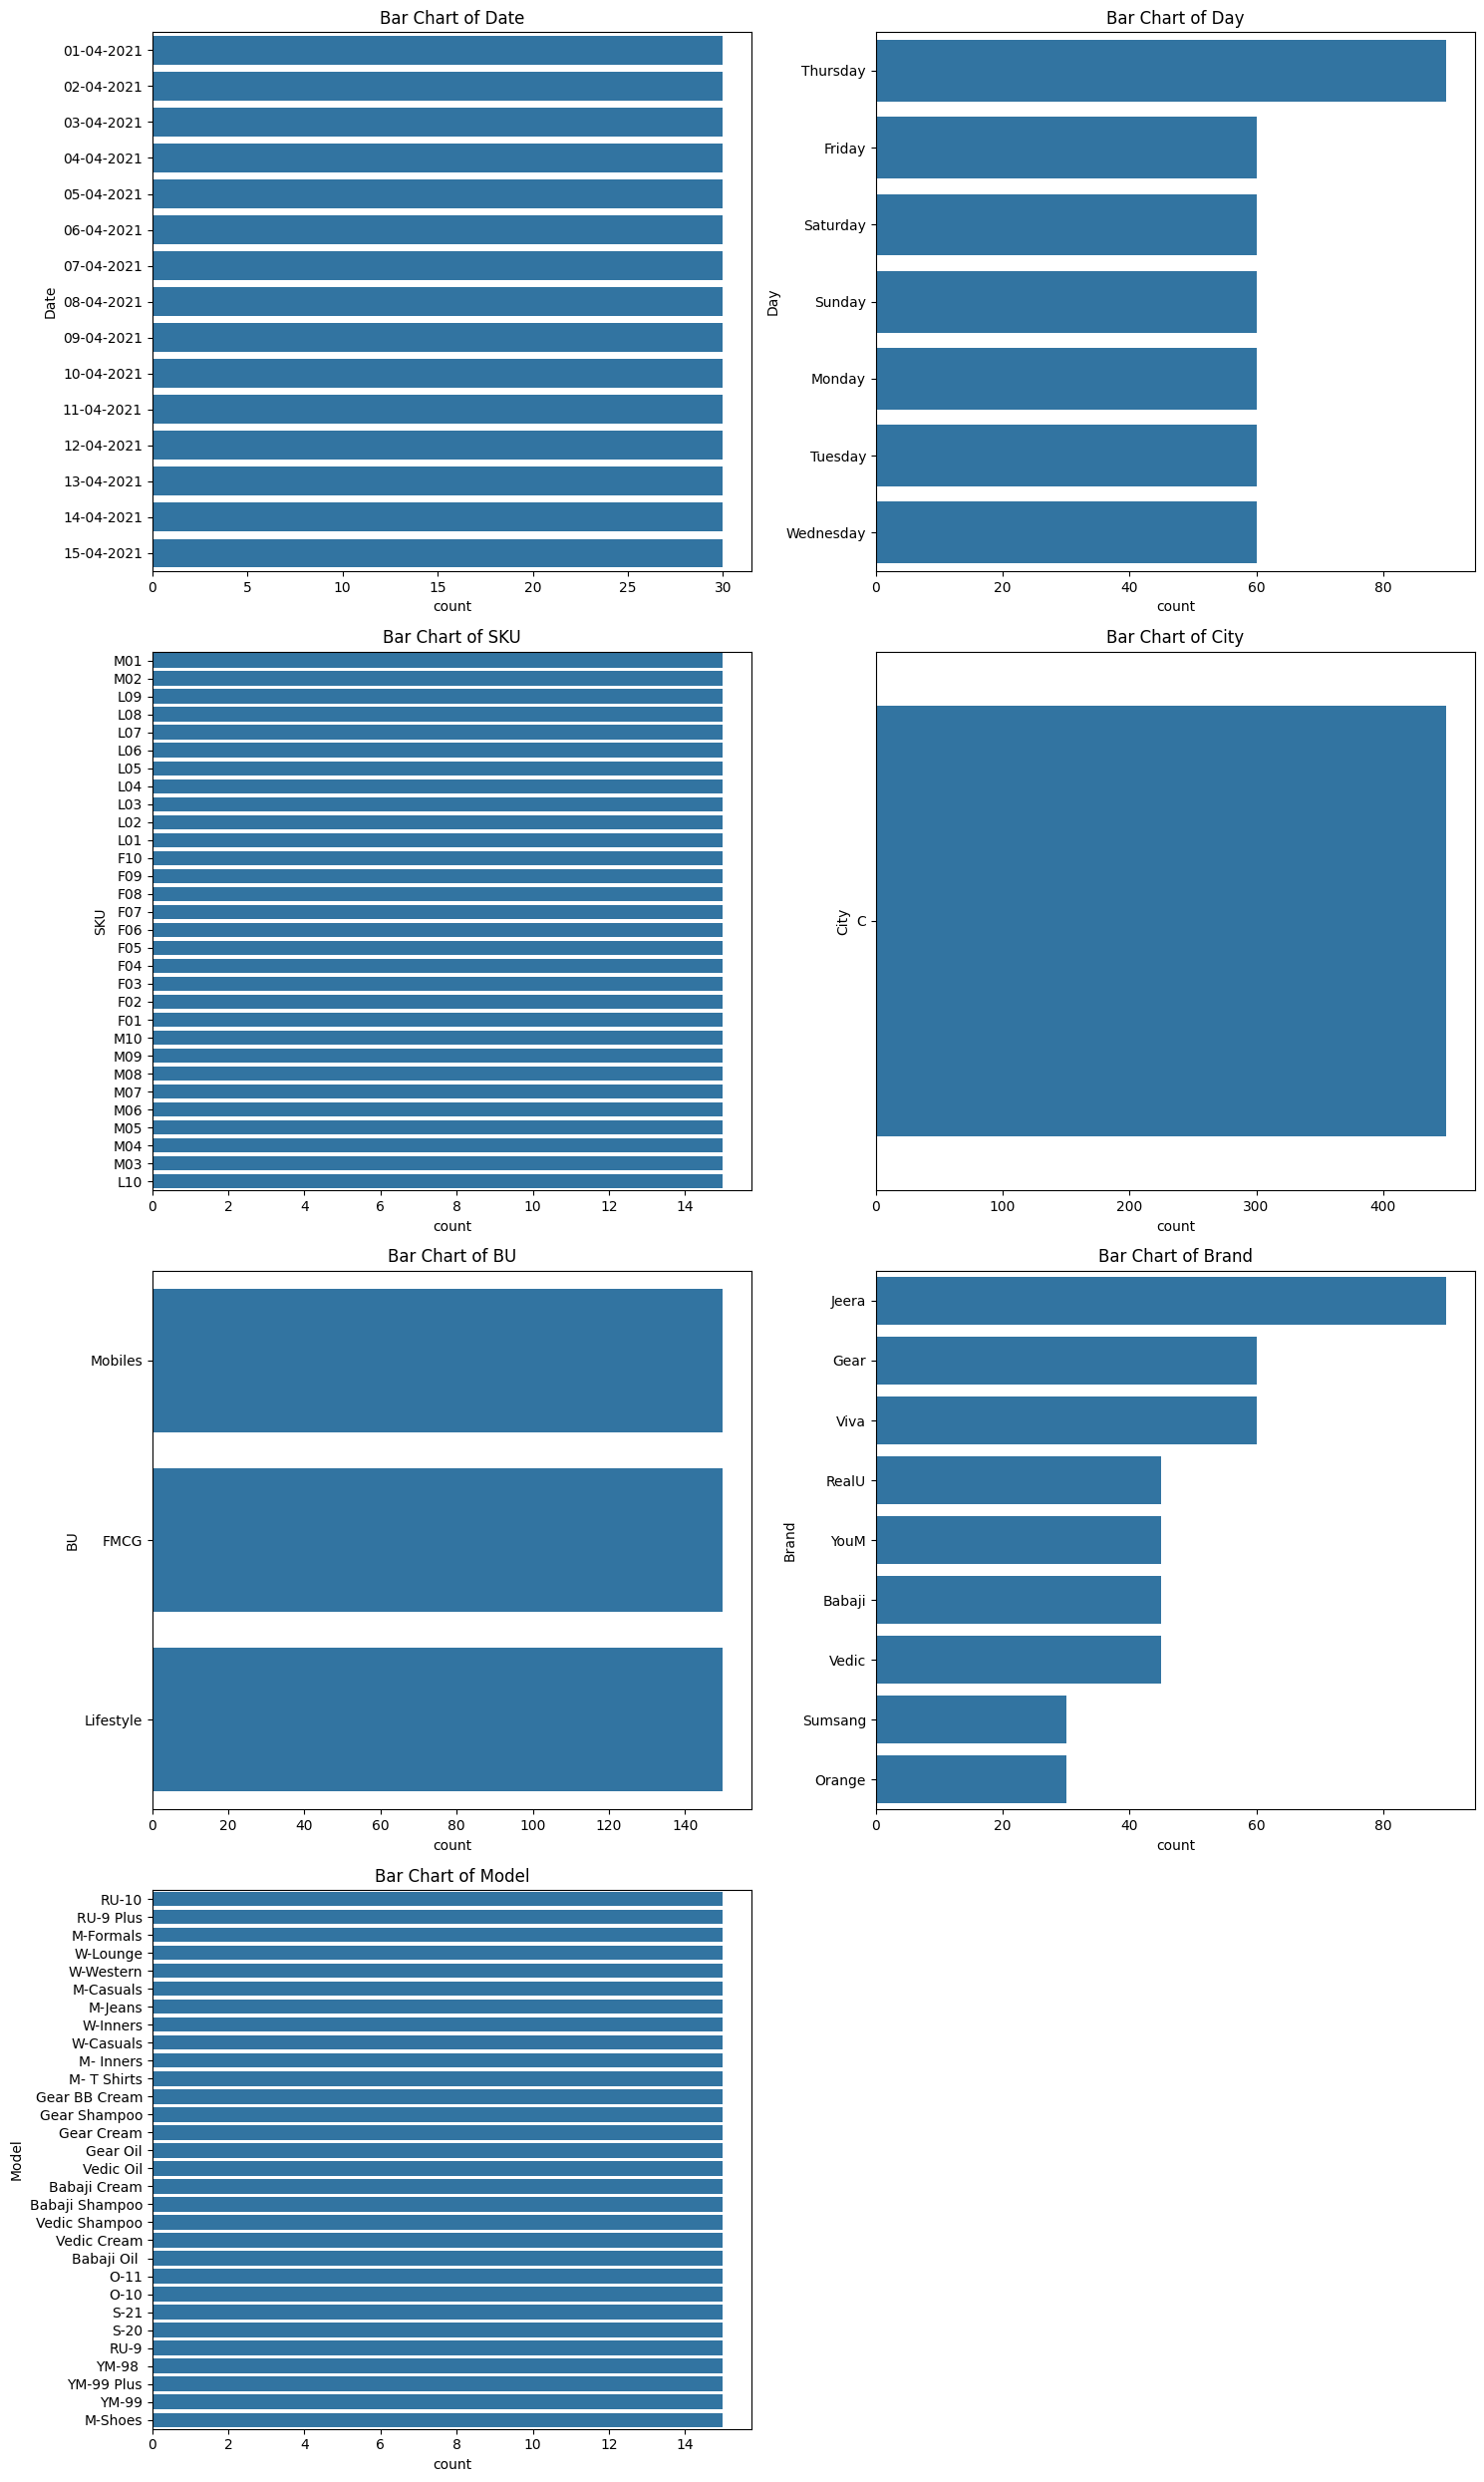

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Plot bar charts for categorical columns
plt.figure(figsize=(15, 25))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 2, i)
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(f'Bar Chart of {column}')

plt.tight_layout()
plt.show()


## **Standardization of Numerical Variables**

In [ ]:
# Standardization (Z-score normalization)
standardized_data = data.copy()
for column in numerical_columns:
    standardized_data[column] = (data[column] - data[column].mean()) / data[column].std()

# Compare before and after standardization
print("Before Standardization:")
print(data[numerical_columns].describe())

print("\nAfter Standardization:")
print(standardized_data[numerical_columns].describe())


Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427  

## **Conversion of Categorical Data into Dummy Variables**

One-hot encoding is essential for preparing categorical data for machine learning algorithms that require numerical inputs. By converting categories into binary variables, you allow your models to learn and make predictions effectively without introducing biases or incorrect assumptions about the data.

In [ ]:
# One-hot encoding of categorical columns
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display a portion of the transformed dataset
print(encoded_data.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False            False   
1     89323.897039            False            False            False   
2    102042.089843            False            False            False   
3    112235.925298            False            False            False   
4     19927.053770            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

## **Overall Insights:**
**Skewness in Data:** Several numerical variables are skewed, with means significantly higher than medians. This suggests the presence of outliers o:r a few extreme values.  
**High Variability:** Columns like "Total Sales Value" and "Net Sales Value" show high variability, indicating that sales transactions vary greatly in size and value.   
**Consistent Discounting:** The discount rates are relatively consistent, with low variability, showing a standardized discount policy.   
**Importance of Preprocessing:** Standardization and one-hot encoding are essential preprocessing steps, especially when preparing data for machine learning, ensuring that models can effectively learn from the data without being biased by extreme values or non-numeric data.